In [10]:
import pandasql
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_sales = pd.read_csv('https://raw.githubusercontent.com/dzakyputra/data/master/ecommerce.csv')

In [8]:
df_sales.head()

,order_id,order_datetime,delivery_start_date,delivery_end_date,customer_name,customer_city,seller_name,seller_city,product_id,product_category,product_weight,product_cost,delivery_cost,payment_type,payment_installments
0,23,2017-08-19 14:06:58,2017-08-29 00:00:00,2017-09-15 00:00:00,Judy Haley,gravatai,Lisa Hartung,maua,P_3,sports_leisure,600.0,29.90,14.10,ticket,1
1,45,2017-09-20 11:49:49,2017-09-22 00:00:00,2017-10-05 00:00:00,Jerry Amsterdam,sao paulo,Lisa Hartung,maua,P_9,sports_leisure,400.0,24.99,8.72,credit_card,1
2,47,2017-08-19 19:25:41,2017-08-31 00:00:00,2017-09-21 00:00:00,Wanda Amaral,salvador,Lisa Hartung,maua,P_11,sports_leisure,400.0,29.90,15.79,credit_card,2
3,228,2018-02-07 13:51:11,2018-02-19 00:00:00,2018-03-08 00:00:00,Lisa Cremer,sarandi,Preston Corsi,sao goncalo,P_19,health_beauty,390.0,119.90,15.59,ticket,1
4,229,2018-06-08 21:58:32,2018-06-18 00:00:00,2018-07-05 00:00:00,Derek Dominguez,campo largo,Preston Corsi,sao goncalo,P_19,health_beauty,390.0,119.50,15.72,credit_card,2


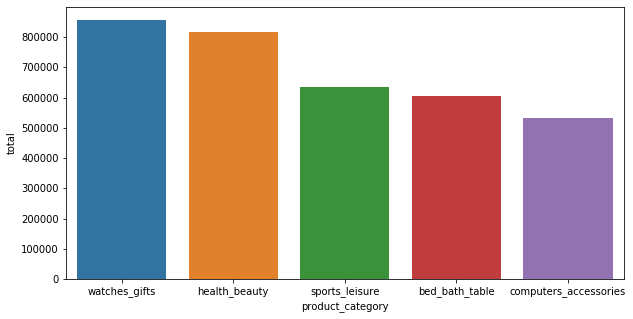

In [24]:
# 1. Cari "product_category" yang menyumbangkan revenue paling banyak (dilihat dari "product_cost"), 
#    dan visualisasikan menggunakan Bar Plot!


# PANDAS
revenue_per_category = df_sales.groupby('product_category', as_index=False)['product_cost'].sum() \
                               .rename(columns={'product_cost': 'total'}) \
                               .sort_values('total', ascending=False)

# PANDASQL
query = """
        SELECT
            product_category,
            SUM(product_cost) AS total
        FROM
            df_sales
        GROUP BY
            product_category
        ORDER BY
            total DESC
        """

result = pandasql.sqldf(query)

plt.figure(figsize=(10,5))
sns.barplot(data=result, x='product_category', y='total')

In [42]:
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26079 entries, 0 to 26078
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   order_id              26079 non-null  int64         
 1   order_datetime        26079 non-null  datetime64[ns]
 2   delivery_start_date   26079 non-null  object        
 3   delivery_end_date     26079 non-null  object        
 4   customer_name         26079 non-null  object        
 5   customer_city         26079 non-null  object        
 6   seller_name           26079 non-null  object        
 7   seller_city           26079 non-null  object        
 8   product_id            26079 non-null  object        
 9   product_category      26079 non-null  object        
 10  product_weight        26079 non-null  float64       
 11  product_cost          26079 non-null  float64       
 12  delivery_cost         26079 non-null  float64       
 13  payment_type    

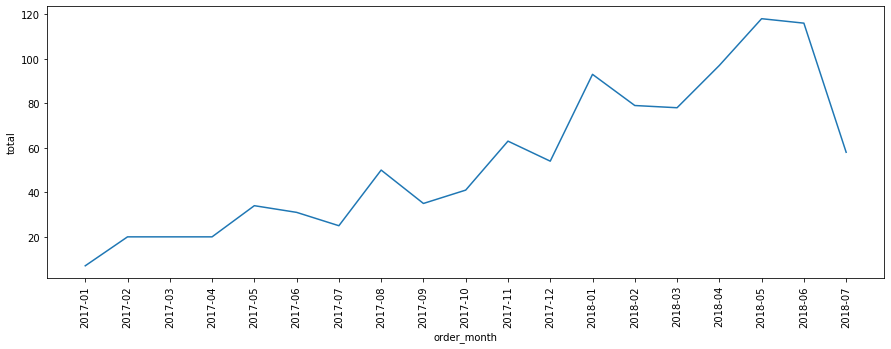

In [46]:
# 2. Tampilkan pergerakan total produk "health_beauty" yang terjual di setiap bulan pada kota "sao paulo"
#    dan visualisasikan menggunakan Line Plot!

# Ubah tipe data order_datetime ke datetime
df_sales['order_datetime'] = pd.to_datetime(df_sales['order_datetime'])

# Ekstrak nilai bulan (2017-01, 2017-02, etc)
df_sales['order_month'] = df_sales['order_datetime'].dt.strftime('%Y-%m')

# PANDAS
total = df_sales.groupby(['order_month', 'product_category', 'customer_city'], as_index=False)['order_id'].count() \
                .rename(columns={'order_id': 'total'})

final_total = total[(total['product_category'] == 'health_beauty') & (total['customer_city'] == 'sao paulo')]

# PANDASQL
query = """
        SELECT
            order_month,
            product_category,
            customer_city,
            COUNT(*) AS total
        FROM
            df_sales
        WHERE
            product_category = 'health_beauty'
            AND customer_city = 'sao paulo'
        GROUP BY
            order_month,
            product_category,
            customer_city
        """

result = pandasql.sqldf(query)

result

plt.figure(figsize=(15,5))
sns.lineplot(data=result, x='order_month', y='total')
plt.xticks(rotation=90)
plt.show()